# Cmpe 548 Assignment 1

Inversion method, Rejection Sampling

## Problem 1

In [287]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def t(x):
    return 2 * np.pi * x

def r(x):
    return np.sqrt(x)

These defined functions are CDF's for variables theta and rho respectively. CDF for theta is trivial since we need a uniform distribution defined in [0, 2 pi]. Integral of PDF should yield 1. So CDF is 1 / 2 pi x. Inverse of this is 2 pi x.

Our approach is to first draw the angle, then draw a point from that line with the drawn angle. If we draw samples from uniform distribution for rho, we cannot have a uniform distribution in the circle.

(-1.0, 1.0, -1.0, 1.0)

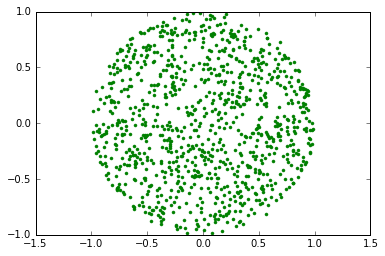

In [290]:
N = 1000
u1 = np.random.rand(N)
u2 = np.random.rand(N)

sample_theta = t(u1)
sample_rho = r(u2)

x = np.cos(sample_theta) * (sample_rho)
y = np.sin(sample_theta) * (sample_rho)

plt.plot(x,y,'.g')
plt.axis('equal')

## Problem 2

hit ratio:  0.40800000000000003


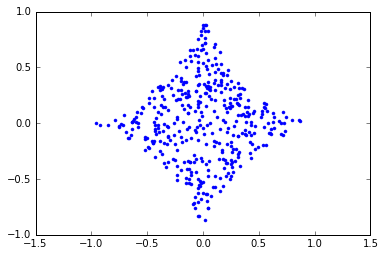

In [289]:
p = 0.7;

hits = [[],[]]
misses = 0

for i in range(N):
    if np.power((np.power(np.absolute(x[i]),p) + np.power(np.absolute(y[i]),p)),1/p) <= 1:
        hits[0].append(x[i])
        hits[1].append(y[i])
    else:
        misses += 1

plt.plot(hits[0],hits[1],'.b')
plt.axis('equal')
print("hit ratio: ", 1-misses/N)